# Importing libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Plotting dataset

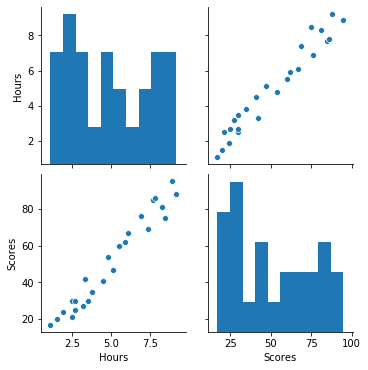

In [5]:
sns.pairplot(dataset)

In [6]:
print(x,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


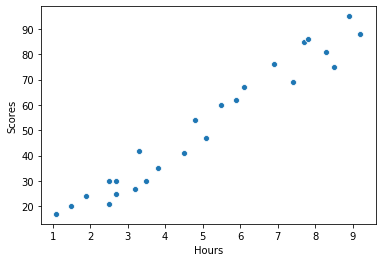

In [7]:
sns.scatterplot(x=dataset.Hours,y=dataset.Scores)

In [8]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
x=dataset['Hours'].values.reshape(-1,1)
y=dataset['Scores'].values.reshape(-1,1)

# Building Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor=LinearRegression()

In [11]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
prediction=regressor.predict(x_test)
prediction

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [13]:
from sklearn import metrics
result=pd.DataFrame(y_test.tolist(),columns=['Actual_value'])
result=result.join(pd.DataFrame(prediction.tolist(),columns=['Predicted_value']))
result

,Actual_value,Predicted_value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Model testing (prediction)

Q?.What will be predicted score if a student study for 9.25 hrs in a
day?

In [14]:
print('The score of a student if he studies for 9.25 hrs in a day:- {}'.format(regressor.predict(np.array(9.25).reshape(-1,1))))

The score of a student if he studies for 9.25 hrs in a day:- [[93.69173249]]


In [15]:
mean_abs_error=metrics.mean_absolute_error(y_test,prediction)
print('Mean absolute error for this is {}'.format(mean_abs_error))

Mean absolute error for this is 4.183859899002975
